In [1]:
# Νασσάρ Κυριακίδου Χαλίμα Δήμητρα 3180127

In [2]:
# !pip install matplotlib
# !pip install pandas
# !pip install scikit-learn
# !pip install tensorflow

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score

%matplotlib inline

In [3]:
#Importing csv file
df = pd.read_csv('BTC-USD.csv', sep=',')
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03
mean,15719.415634,16149.190574,15246.125051,15739.152574,15739.152574,2.127398e+10
std,17084.857603,17549.637103,16544.622859,17086.838551,17086.838551,2.119026e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,5692.704834,5837.803833,5507.887574,5712.787476,5712.787476,4.662696e+09
50%,8709.403808,8880.675293,8482.153320,8721.874024,8721.874024,1.667075e+10
75%,14692.324952,15553.974854,13910.174805,14800.115478,14800.115478,3.278407e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [4]:
#Preprocessing:

#Deleting Adj Close column, since its the same with Close on every entry
df = df.drop(["Adj Close"], axis = 1)
df.head(5) #displaying only first rows to keep it clean


,Date,Open,High,Low,Close,Volume
0,2017-01-11,908.114990,919.447998,762.765015,777.757019,310928992
1,2017-01-12,775.177979,826.245972,755.755981,804.833984,222326000
2,2017-01-13,803.737000,829.000977,780.002991,823.984009,168968000
3,2017-01-14,825.142029,835.085022,812.455994,818.411987,93063296
4,2017-01-15,818.142029,823.307007,812.870972,821.797974,71013600


In [5]:
#Turns dates from strings to date object (useful for diagrams later)
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1826 non-null   datetime64[ns]
 1   Open    1826 non-null   float64       
 2   High    1826 non-null   float64       
 3   Low     1826 non-null   float64       
 4   Close   1826 non-null   float64       
 5   Volume  1826 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 85.7 KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03
mean,15719.415634,16149.190574,15246.125051,15739.152574,2.127398e+10
std,17084.857603,17549.637103,16544.622859,17086.838551,2.119026e+10
min,775.177979,823.307007,755.755981,777.757019,6.085170e+07
25%,5692.704834,5837.803833,5507.887574,5712.787476,4.662696e+09
50%,8709.403808,8880.675293,8482.153320,8721.874024,1.667075e+10
75%,14692.324952,15553.974854,13910.174805,14800.115478,3.278407e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


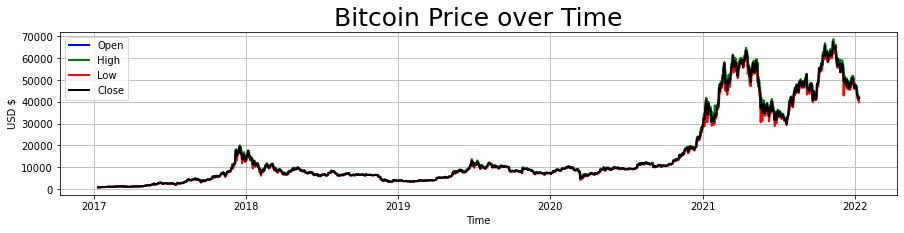

In [7]:
#Visualising data prices
plt.rcParams["figure.figsize"] = (15, 3)
plt.plot( df[['Date']],df[['Open']], color='blue', linewidth=2, markersize=5, label = 'Open')
plt.plot( df[['Date']],df[['High']], color='green', linewidth=2, markersize=5, label = 'High')
plt.plot( df[['Date']],df[['Low']], color='red', linewidth=2, markersize=5, label = 'Low')
plt.plot( df[['Date']],df[['Close']], color='black', linewidth=2, markersize=5, label = 'Close')

plt.title("Bitcoin Price over Time", size=25)
plt.xlabel("Time")
plt.ylabel("USD $")
plt.grid()
plt.legend()
plt.show()

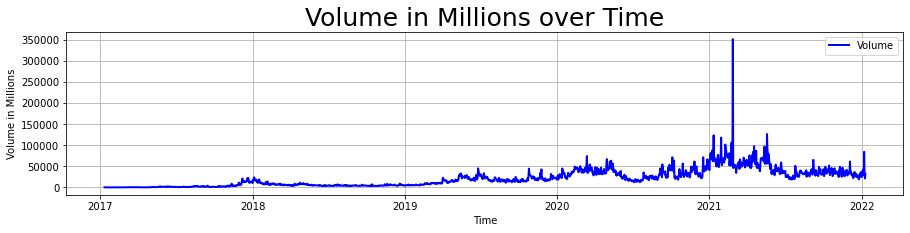

In [8]:
#Visualising data volume
plt.rcParams["figure.figsize"] = (15, 3)

#dividing volume by 10^6
plt.plot( df[['Date']],df[['Volume']].div(10**6), color='blue', linewidth=2, markersize=5, label = 'Volume')

plt.xlabel("Time")
plt.ylabel("Volume in Millions")
plt.title("Volume in Millions over Time", size=25)
plt.grid()
plt.legend()

plt.show()

In [9]:
#Splitting data into 80% training and 20% testing
X = df[['Open','High','Low']]

y = df[['Close']]

#No shuffle for time-related data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False) 

y_train

,Close
0,777.757019
1,804.833984
2,823.984009
3,818.411987
4,821.797974
...,...
1455,33992.429688
1456,36824.363281
1457,39371.042969
1458,40797.609375


In [10]:
#Normalising X data into [0,1] (Using the maximum and minimum of the data provided)
normalizeScaler = MinMaxScaler()
X_train[['Open','High','Low']] = normalizeScaler.fit_transform(X_train[['Open','High','Low']])
X_test[['Open','High','Low']] = normalizeScaler.transform(X_test[['Open','High','Low']])

#Denormalize code
#X_train[['Open','High','Low','Volume']] = normalizeScaler.inverse_transform(X_train[['Open','High','Low','Volume']])
#X_test[['Open','High','Low','Volume']] = normalizeScaler.inverse_transform(X_test[['Open','High','Low','Volume']])


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [11]:
X_train.describe()
#Everything is normalized correctly (notice min and max values of each column are 0 and 1)

,Open,High,Low
count,1460.000000,1460.000000,1460.000000
mean,0.173414,0.172585,0.176705
std,0.117564,0.119092,0.118976
min,0.000000,0.000000,0.000000
25%,0.084865,0.085019,0.086596
50%,0.166119,0.164602,0.170629
75%,0.223057,0.221072,0.229414
max,1.000000,1.000000,1.000000


In [12]:
X_test.describe()
#Test data is normalized with the factors that were fitted in train data, noticing that they should be really close.

,Open,High,Low
count,366.000000,366.000000,366.000000
mean,1.171560,1.170874,1.186367
std,0.239832,0.234299,0.250532
min,0.725284,0.733958,0.736109
25%,0.956596,0.963344,0.955918
50%,1.174996,1.175771,1.201556
75%,1.384371,1.384701,1.400295
max,1.668802,1.652739,1.716837


In [13]:
#Linear Regression (Multiple) training the model
linregr = linear_model.LinearRegression()
linregr.fit(X_train, y_train)

#Fetching predictions from test data
y_prediction = linregr.predict(X_test)
y_prediction

array([[38563.09033354],
       [33416.58699245],
       [34640.84622454],
       [36254.73388886],
       [39317.42465928],
       [36677.02933311],
       [36969.36503251],
       [35319.69206981],
       [36517.40743048],
       [37240.30044509],
       [34763.28940328],
       [32199.4791242 ],
       [32220.6898032 ],
       [32361.32628012],
       [32213.43632992],
       [34330.52560186],
       [31890.05191711],
       [30537.69154528],
       [33123.79762709],
       [36423.03765244],
       [33900.29769272],
       [33016.91478529],
       [33964.76206197],
       [35543.67582294],
       [37167.37297369],
       [37706.81985353],
       [37875.42027784],
       [40477.64519806],
       [38430.17726963],
       [44698.36433076],
       [47117.52995231],
       [45421.78307155],
       [47533.75866994],
       [47715.18091377],
       [47282.45941163],
       [49170.41714152],
       [47372.10771396],
       [49551.53019615],
       [52003.60635267],
       [51725.73439181],


In [14]:
y_test

,Close
1460,38356.441406
1461,35566.656250
1462,33922.960938
1463,37316.359375
1464,39187.328125
...,...
1821,43160.929688
1822,41557.902344
1823,41733.941406
1824,41911.601563


In [15]:
r_sq = linregr.score(X_test, y_test)
#r^2
print('coefficient of determination:', r_sq)
#b0
print('intercept:', linregr.intercept_)
#b1,b2,b3,b4
print('slope:', linregr.coef_)
#RMSE
print('Root Mean Squared Error:', mean_squared_error(y_test,y_prediction, squared = False))

#Same statistics but with normalised target variable 'Close'
print("\nSame statistics but with normalised target variable 'Close'")
normalizeScaler = MinMaxScaler()
y_test = normalizeScaler.fit_transform(y_test)
y_prediction = normalizeScaler.fit_transform(y_prediction)

#RMSE
print('Root Mean Squared Error:', mean_squared_error(y_test,y_prediction, squared = False))



rmseLinear = mean_squared_error(y_test,y_prediction, squared = False) #0.02 normalised
##RMSE for version sklearn < 0.22.0
#from math import sqrt
#print('Root Mean Squared Error: ', sqrt(mean_squared_error(y_actual, y_predicted)))

coefficient of determination: 0.9925929387698085
intercept: [776.73353381]
slope: [[-19839.21814464  35547.96814072  24161.68640684]]
Root Mean Squared Error: 824.0396275955551

Same statistics but with normalised target variable 'Close'
Root Mean Squared Error: 0.0214098035428933


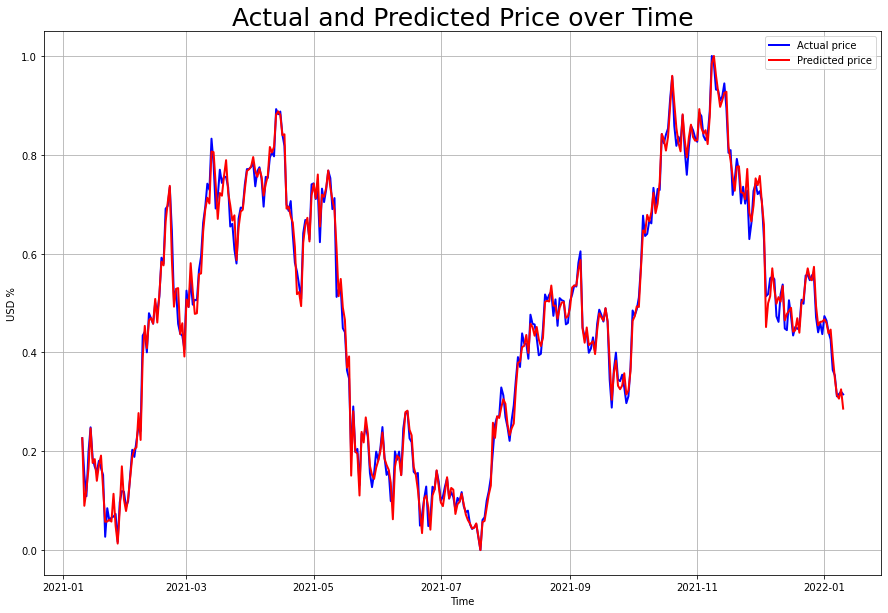

In [16]:
#Visualizing the model last year (20%) prediction
plt.rcParams["figure.figsize"] = (15, 10)

#Plot actual values
plt.plot( df[['Date']].iloc[-1*len(y_test):], y_test , color='blue', linewidth=2, markersize=5, label = 'Actual price')

#Plot predicted values
plt.plot( df[['Date']].iloc[-1*len(y_prediction):], y_prediction , color='red', linewidth=2, markersize=5, label = 'Predicted price')

plt.xlabel("Time")
plt.ylabel("USD %")
plt.title("Actual and Predicted Price over Time", size=25)
plt.grid()
plt.legend()

plt.show()

In [17]:
#Getting the data to numpy format to split the for the Cross Validation
X = X.to_numpy()
y = y.to_numpy()

In [18]:
#Time series Cross Validation

#Splitting the data into 6 pieces
tscv = TimeSeriesSplit(n_splits=5)

score_sum = 0
split_count = 1
for train_index, test_index in tscv.split(X):
    #For every split
    print("Split {}: \n TRAIN data start from index 0 to {} \n TEST data start from index {} to {}".format(split_count, train_index[-1],test_index[0],test_index[-1]))
    split_count += 1
    
    #Assigning the data of the split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Normalize the data depending on the X_train variables (min-max)
    normalizeScaler = MinMaxScaler()
    X_train = normalizeScaler.fit_transform(X_train)
    X_test = normalizeScaler.transform(X_test)
    
    #Checking normalization
    #X_train_dataframe = pd.DataFrame(X_train, columns = ['Open','High','Low','Volume'])
    #print(X_train_dataframe.describe())
    
    #Linear Regression (Multiple) training the model on specific split of the data
    linregr = linear_model.LinearRegression()
    linregr.fit(X_train, y_train)
    
    split_score = linregr.score(X_test, y_test)
    score_sum += split_score
    print(" Score r^2: {}\n".format(split_score))

    

print("Average Score r^2: {}".format(score_sum/(split_count-1)))
r_sq = score_sum/(split_count-1)
r_sqLinearCV = r_sq

Split 1: 
 TRAIN data start from index 0 to 305 
 TEST data start from index 306 to 609
 Score r^2: 0.9940250416697337

Split 2: 
 TRAIN data start from index 0 to 609 
 TEST data start from index 610 to 913
 Score r^2: 0.9979614740511387

Split 3: 
 TRAIN data start from index 0 to 913 
 TEST data start from index 914 to 1217
 Score r^2: 0.990732944636228

Split 4: 
 TRAIN data start from index 0 to 1217 
 TEST data start from index 1218 to 1521
 Score r^2: 0.9988091036009892

Split 5: 
 TRAIN data start from index 0 to 1521 
 TEST data start from index 1522 to 1825
 Score r^2: 0.9928265654608488

Average Score r^2: 0.9948710258837877


In [19]:
#Logistic Regression
#Preprocessing:
dflogre = df.copy()

In [20]:
#Moving average of Close value the previous week
dflogre['SMA7'] = dflogre['Close'].rolling(7).mean()

#Dropping first 6 days since we don't have SMA7 complete value
dflogre.dropna(inplace = True) #(Same as dflogre[6:] = dflogre)

#Making  a True/False column if the Close value is bigger than the Average of the last 7 days its True (1)
dflogre['Trend'] = [1 if i>0 else 0 for i in dflogre['Close'] - dflogre['SMA7']]

#Dropping the columns we won't need in the model anymore and resetting index
dflogre = dflogre.drop(['Close', 'Volume'], axis=1)
dflogre= dflogre.reset_index()
dflogre = dflogre.drop(['index'], axis=1)

dflogre

,Date,Open,High,Low,SMA7,Trend
0,2017-01-17,830.945984,910.560974,830.796021,826.608137,1
1,2017-01-18,909.372986,917.499023,858.304016,842.159703,1
2,2017-01-19,888.335022,904.614014,884.338013,855.622419,1
3,2017-01-20,898.171997,899.398010,887.007996,865.771275,1
4,2017-01-21,895.549011,927.367004,895.534973,880.539420,1
...,...,...,...,...,...,...
1815,2022-01-06,43565.511719,43748.718750,42645.539063,45774.871652,0
1816,2022-01-07,43153.570313,43153.570313,41077.445313,45096.508371,0
1817,2022-01-08,41561.464844,42228.941406,40672.277344,44246.098214,0
1818,2022-01-09,41734.726563,42663.949219,41338.160156,43469.867188,0


In [21]:
#Splitting data into 80% training and 20% testing
y = dflogre[['Trend']].to_numpy().ravel()
X = dflogre[['Open','High','Low','SMA7']]

#No shuffle for time-related data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False) 

#Normalising doesn't help with the scores here

# #Normalising with StandardScaler (MinMaxScaler was ruinning the model learning process)
# from sklearn.preprocessing import StandardScaler
# normalizeScaler = StandardScaler()
# X_train[['Open','High','Low','SMA7']] = normalizeScaler.fit_transform(X_train[['Open','High','Low','SMA7']])
# X_test[['Open','High','Low','SMA7']] = normalizeScaler.transform(X_test[['Open','High','Low','SMA7']])
# print(X_train.describe())
# print(X_test.describe())

#Formatting for the model
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X = X.to_numpy()

In [22]:
#Logistic Regression training the model
logre = linear_model.LogisticRegression()
logre.fit(X_train, y_train)
#Fetching predictions from test data
y_prediction = logre.predict(X_test)
y_prediction

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [23]:
r_sq = logre.score(X_test, y_test)
#r^2
print('coefficient of determination:', r_sq)
#b0
print('intercept:', logre.intercept_)
#b1,b2,b3,b4
print('slope:', logre.coef_)
#RMSE
print('Root Mean Squared Error:', mean_squared_error(y_test,y_prediction, squared = False) )

rmseLogistic = mean_squared_error(y_test,y_prediction, squared = False)
#Diagnostics

coefficient of determination: 0.8708791208791209
intercept: [3.35746988e-05]
slope: [[-0.01782149  0.02290583  0.01908445 -0.02417893]]
Root Mean Squared Error: 0.35933393817016385


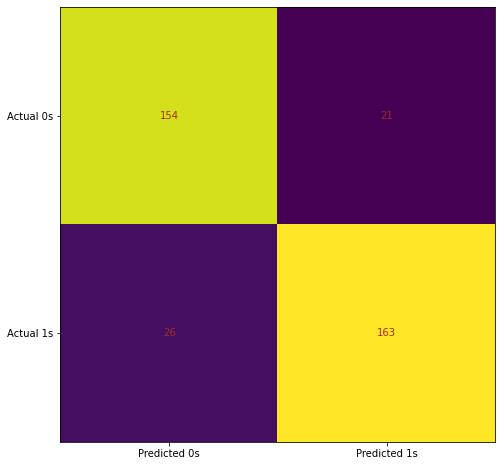

Precision:  0.8707125603864734
Recall:  0.8712169312169312
F_score:  0.8708001359362609


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, logre.predict(X_test))
#Plotting the matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='brown')
plt.show()

from sklearn.metrics import precision_recall_fscore_support
stats = precision_recall_fscore_support(y_test, logre.predict(X_test), average='macro')
print("Precision: ", stats[0])
print("Recall: ", stats[1])
print("F_score: ", stats[2])


#The diagram shows True Negative, False Negative, 
#                  False Positive, True Positive values

In [25]:
#Time series Cross Validation

#Splitting the data into 6 pieces
tscv = TimeSeriesSplit(n_splits=5)

score_sum = 0
split_count = 1
for train_index, test_index in tscv.split(X):
    #For every split
    print("Split {}: \n TRAIN data start from index 0 to {} \n TEST data start from index {} to {}".format(split_count, train_index[-1],test_index[0],test_index[-1]))
    split_count += 1
    
    #Assigning the data of the split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Normalizing doesn't help
#     X_train = normalizeScaler.fit_transform(X_train)
#     X_test = normalizeScaler.transform(X_test)

    #Logistic Regression training the model on specific split of the data
    logre = linear_model.LogisticRegression()
    logre.fit(X_train, y_train)
    
    split_score = logre.score(X_test, y_test)
    score_sum += split_score
    print(" Score r^2: {}".format(split_score))
    
    #Printing Confusion Matrix
    print(" Confusion Matrix: [TN,FN] {} \n                   [FP,TP] {}".format(confusion_matrix(y_test, logre.predict(X_test))[0],confusion_matrix(y_test, logre.predict(X_test))[1]))
    

print("AVERAGE Score r^2: {}".format(score_sum/(split_count-1)))
r_sqLogisticCV = score_sum/(split_count-1)

Split 1: 
 TRAIN data start from index 0 to 304 
 TEST data start from index 305 to 607
 Score r^2: 0.9372937293729373
 Confusion Matrix: [TN,FN] [135  14] 
                   [FP,TP] [  5 149]
Split 2: 
 TRAIN data start from index 0 to 607 
 TEST data start from index 608 to 910
 Score r^2: 0.8844884488448845
 Confusion Matrix: [TN,FN] [116  26] 
                   [FP,TP] [  9 152]
Split 3: 
 TRAIN data start from index 0 to 910 
 TEST data start from index 911 to 1213
 Score r^2: 0.933993399339934
 Confusion Matrix: [TN,FN] [145   8] 
                   [FP,TP] [ 12 138]
Split 4: 
 TRAIN data start from index 0 to 1213 
 TEST data start from index 1214 to 1516
 Score r^2: 0.8943894389438944
 Confusion Matrix: [TN,FN] [97  7] 
                   [FP,TP] [ 25 174]
Split 5: 
 TRAIN data start from index 0 to 1516 
 TEST data start from index 1517 to 1819
 Score r^2: 0.8943894389438944
 Confusion Matrix: [TN,FN] [137  18] 
                   [FP,TP] [ 14 134]
AVERAGE Score r^2: 0.90891

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#Neural Network
#Preprocessing:
dfnn = df.copy()

data = dfnn.filter(['Close'])
data_to_scale = data.values #Only the values in the DataFrame, no axes labels

# Get the number of rows to train the model on 80% of the data 
training_df_length = math.ceil(len(data_to_scale) * 0.8)

# Transform features by scaling each feature to a range between 0 and 1
normalizeScaler = MinMaxScaler(feature_range=(0, 1))
data_final = normalizeScaler.fit_transform(data_to_scale)
data_final

array([[0.00000000e+00],
       [4.05410115e-04],
       [6.92134046e-04],
       ...,
       [6.13216859e-01],
       [6.15876877e-01],
       [6.12785990e-01]])

In [27]:
days_for_prediction = 50 # we need 50 days to make a prediction

# Prediction Index
index_Close = data.columns.get_loc("Close")
print(index_Close)
# Split the training data into 80% training and 20% test datasets
train_data_len = math.ceil(data_final.shape[0] * 0.8) # number of rows for training dataset

# Create the training and test datasets
train_data = data_final[0:train_data_len, :]
test_data = data_final[train_data_len - days_for_prediction:, :]


0


In [28]:
X_train = []
Y_train = []
for i in range(days_for_prediction, train_data.shape[0]):
    X_train.append(train_data[i-days_for_prediction:i,:]) #contains days_for_prediction values 0-days_for_prediction * columns
    Y_train.append(train_data[i, index_Close]) #contains the prediction values
    
X_train, Y_train = np.array(X_train), np.array(Y_train) #Converting to numpy arrays
print(X_train.shape, Y_train.shape) # X_train format: (rows, training_sequence, features), Y_train format: (prediction value, )
# X_train -> The result bellow means that we have 1411 mini-batches, each mini-batch correlates to 50 days 
# Y_train -> Contains 1411 validation values -> one for each mini-batch

(1411, 50, 1) (1411,)


In [29]:
X_test = []
Y_test = []
for i in range(days_for_prediction, test_data.shape[0]):
    X_test.append(test_data[i-days_for_prediction:i,:])
    Y_test.append(test_data[i, index_Close])
    
X_test, Y_test = np.array(X_test), np.array(Y_test) #Converting to numpy arrays
print(X_test.shape, Y_test.shape) # X_test format: (rows, training_sequence, features), Y_test format: (prediction value, )

(365, 50, 1) (365,)


In [30]:
# The neural network model
model = Sequential()

neurons = days_for_prediction # we need 50 days and our input contains values for 50 days

# Model with days_for_prediction Neurons 
# inputshape = days_for_prediction Timestamps
model.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], 1))) 
model.add(LSTM(25, return_sequences=True))
model.add(LSTM(25, return_sequences=False))
model.add(Dense(1))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 25)            7600      
                                                                 
 lstm_2 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 23,126
Trainable params: 23,126
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Training the model
history = model.fit(X_train, Y_train, epochs=40)

Epoch 1/40
45/45 [==============================] - 10s 67ms/step - loss: 0.0033
Epoch 2/40
45/45 [==============================] - 3s 67ms/step - loss: 4.7808e-04
Epoch 3/40
45/45 [==============================] - 4s 79ms/step - loss: 3.3779e-04
Epoch 4/40
45/45 [==============================] - 3s 67ms/step - loss: 3.2596e-04: 0s - loss
Epoch 5/40
45/45 [==============================] - 3s 66ms/step - loss: 2.7955e-04
Epoch 6/40
45/45 [==============================] - 3s 73ms/step - loss: 2.6265e-04
Epoch 7/40
45/45 [==============================] - 3s 67ms/step - loss: 2.2608e-04
Epoch 8/40
45/45 [==============================] - 3s 76ms/step - loss: 2.4002e-04
Epoch 9/40
45/45 [==============================] - 4s 81ms/step - loss: 2.1048e-04
Epoch 10/40
45/45 [==============================] - 3s 70ms/step - loss: 2.0140e-04
Epoch 11/40
45/45 [==============================] - 3s 63ms/step - loss: 2.0842e-04
Epoch 12/40
45/45 [==============================] - 3s 68ms/step 

In [32]:
#Get the predicted values 
Y_pred_scaled = model.predict(X_test)


In [33]:
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(Y_test, Y_pred_scaled)
print(f'Median Absolute Error (MAE): {np.round(mae, 2)}')

# Calculate the root mean squarred error (RMSE)
rmseNN = float(mean_squared_error(Y_test, Y_pred_scaled, squared = False))
print('RMSE: ' + str(rmseNN))


Median Absolute Error (MAE): 0.04
RMSE: 0.045637807715879476


In [34]:
# we have scaled the input data to a range between 0 and 1, so we need to inverse the scaling
Y_pred = normalizeScaler.inverse_transform(Y_pred_scaled)

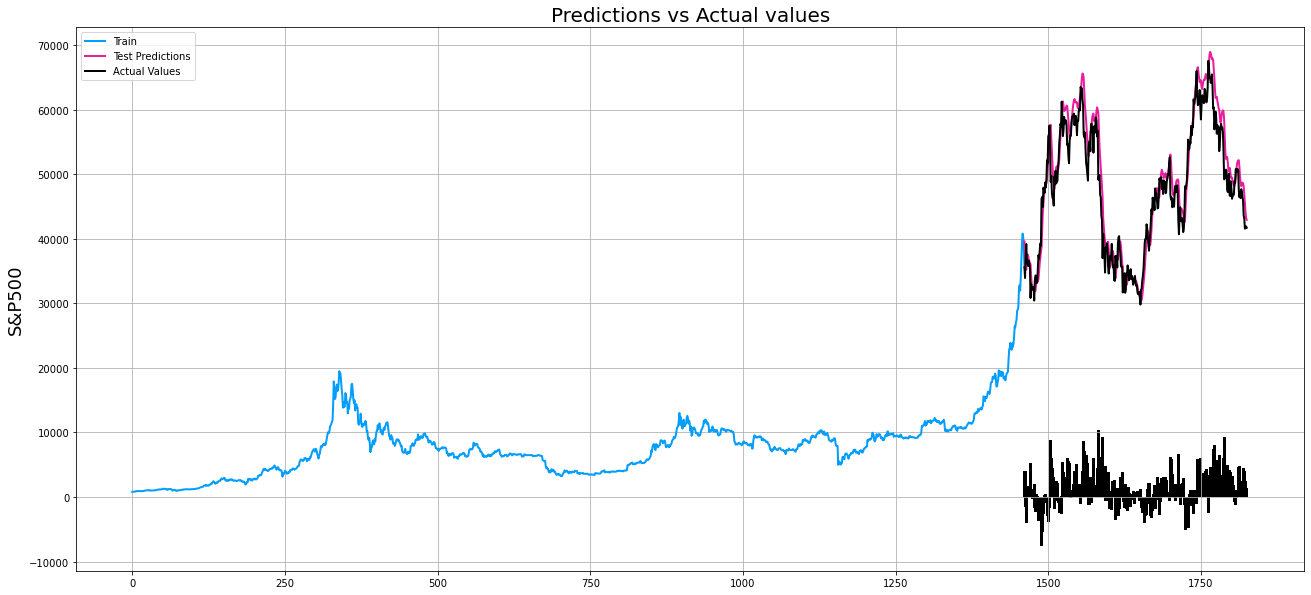

In [35]:
# Add the difference between the valid and predicted prices
train = data[:training_df_length + 1]
valid = data[training_df_length:]
valid.insert(1, "Predictions", Y_pred, True)
valid.insert(1, "Difference", valid["Predictions"] - valid["Close"], True)

# Zoom in to a closer timeframe
stockname = 'S&P500'

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train.index; yt = train[["Close"]]
xv = valid.index; yv = valid[["Close", "Predictions"]]
plt.title("Predictions vs Actual values", fontsize=20)
plt.ylabel(stockname, fontsize=18)
plt.plot(yt, color="#039dfc", linewidth=2.0)
plt.plot(yv["Predictions"], color="#E91D9E", linewidth=2.0)
plt.plot(yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

# Create the bar plot with the differences
x = valid.index
y = valid["Difference"]
plt.bar(x, y, width=5, color="black")
plt.grid()
plt.show()

In [36]:
# Show the valid and predicted prices
dif = valid['Close'] - valid['Predictions']
valid.insert(2, 'Difference', dif, True)
valid.head(5)

,Close,Difference,Difference,Predictions
1461,35566.656250,4022.761719,-4022.761719,39589.417969
1462,33922.960938,4065.816406,-4065.816406,37988.777344
1463,37316.359375,-1620.804688,1620.804688,35695.554688
1464,39187.328125,-3961.863281,3961.863281,35225.464844
1465,36825.367188,-158.785157,158.785157,36666.582031


In [37]:
# Get fresh data until today
df_new = df.filter(['Close'])

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_days_scaled = normalizeScaler.transform(df_new[-days_for_prediction:].values)

# Create an empty list and Append past n days
X_test1 = []
X_test1.append(last_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))

# Get the predicted scaled price, undo the scaling and output the predictions
pred_price = model.predict(X_test1)
pred_price_unscaled = normalizeScaler.inverse_transform(pred_price)

# Print last price and predicted price for the next day
price_today = round(df_new['Close'].iloc[-1], 2)
predicted_price = round(pred_price_unscaled.ravel()[0], 2)
percent = round(100 - (predicted_price * 100)/price_today, 2)

plus = '+'; minus = '-'
print(f'The close price for today was {price_today}')
print(f'The predicted close price is {predicted_price} (and the difference from the actual price in percentage is {plus if percent > 0 else minus}{percent}%)')

The close price for today was 41705.16
The predicted close price is 42886.921875 (and the difference from the actual price in percentage is --2.83%)


In [38]:
Y_test_unscaled = normalizeScaler.inverse_transform(Y_test.reshape(-1,1)) 

r_sqNN = r2_score(Y_test_unscaled, Y_pred)
print(r_sqNN)

0.898668859742042


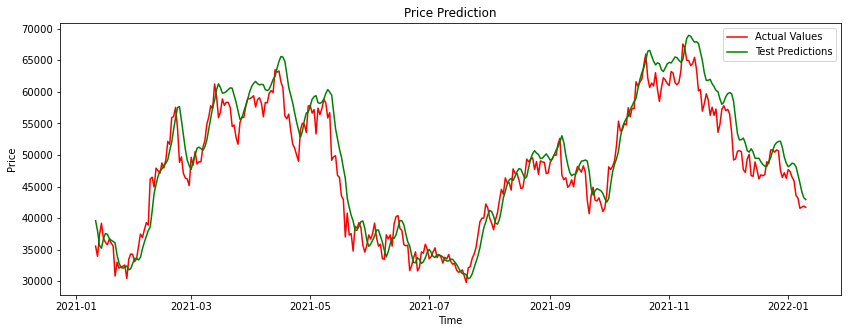

In [42]:
plt.figure(figsize=(14,5))
plt.plot(df[['Date']].iloc[-1*len(Y_test_unscaled):], Y_test_unscaled, color = 'red', label = 'Actual Values')
plt.plot(df[['Date']].iloc[-1*len(Y_pred):],Y_pred, color = 'green', label = 'Test Predictions')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

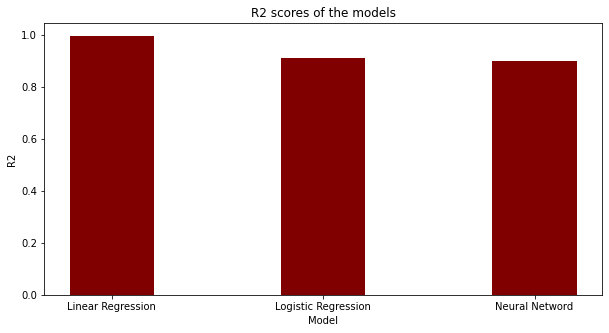

In [40]:
#4) Ploting and Comparing Models
##Ploting R2 scores
r_2scores = {'Linear Regression':r_sqLinearCV, 'Logistic Regression':r_sqLogisticCV, 'Neural Network':r_sqNN}

modelnames = list(r_2scores.keys())
r2scoresvalues = list(r_2scores.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(modelnames, r2scoresvalues, color ='maroon',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("R2")
plt.title("R2 scores of the models")
plt.show()

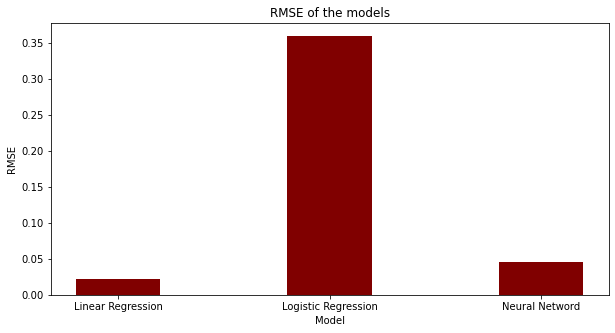

In [41]:
##Ploting RMSE
rmse = {'Linear Regression':rmseLinear, 'Logistic Regression':rmseLogistic, 'Neural Network':rmseNN}

modelnames = list(rmse.keys())
rmsevalues = list(rmse.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(modelnames, rmsevalues, color ='maroon',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE of the models")
plt.show()

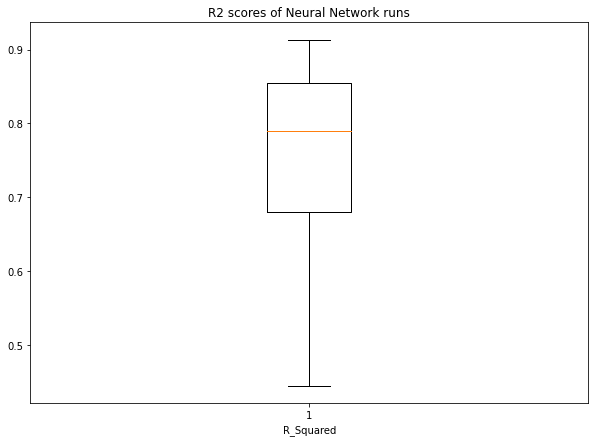

In [3]:
#Neural Network R squared plot

r_sqNNs = [0.8430057815440511,
          0.5415055951386889,
          0.6360360166946146,
          0.8807525846550086,
          0.8538807705911514,
          0.802422837425409,
          0.7011838092251079,
          0.8746673273748771,
          0.7175804891994451,
          0.880820903465401,
          0.8275894757587767,
          0.679931033612407,
          0.6672805713857815,
          0.6414827932544496,
          0.885113044961041,
          0.8551860332071912,
          0.7480297009269817,
          0.4446033959108674,
          0.790179666235221,
          0.7460961357497613,
          0.6957390575916411,
          0.831237776594216,
          0.9133404415528616,
          0.5862821054451367,
          0.8734500238628223]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(r_sqNNs)
plt.xlabel("R_Squared")
plt.title("R2 scores of Neural Network runs")

# show plot
plt.show()

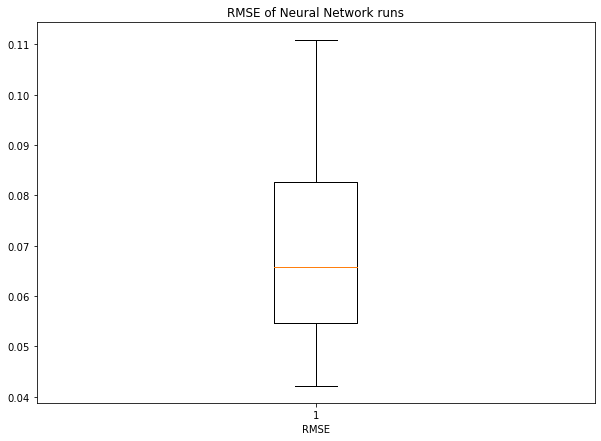

In [4]:
#Neural Network RMSE plot

rmseNNs = [0.05680612116355366,
          0.09707788408254592,
          0.08649330668791029,
          0.04950827741321953,
          0.05480333528798966,
          0.0637267365122005,
          0.11094303528468125,
          0.05075577502633844,
          0.07619047112955847,
          0.04949408967552882,
          0.05952990731491669,
          0.08111012981041185,
          0.08269749909618587,
          0.10714491336878564,
          0.048594673488210935,
          0.054558012296076444,
          0.07196610347991385,
          0.1068451681999847,
          0.06567152312694909,
          0.07224169807857016,
          0.07908177518958595,
          0.058896695900645155,
          0.04220476815902611,
          0.09221582360850686,
          0.05100166327305589]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(rmseNNs)
plt.xlabel("RMSE")
plt.title("RMSE of Neural Network runs")

# show plot
plt.show()